<a href="https://colab.research.google.com/github/Jidnya28/Furniture-Sales-Forecasting/blob/main/Furniture_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the Libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the data

In [28]:
df=pd.read_excel("/content/Sample - Superstore.xls",index_col=0,header=0)

In [29]:
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 non-nu

In [31]:
df.shape

(9994, 20)

In [32]:
df["Category"].value_counts()

,count
Category,
Office Supplies,6026
Furniture,2121
Technology,1847


Filtering the data on Furniture Category

In [33]:
furniture = df[df['Category']== 'Furniture']

In [34]:
furniture

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,Texas,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,Delaware,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,Louisiana,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548


In [35]:
furniture.shape

(2121, 20)

In [36]:
furniture.dtypes

,0
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object
State,object


In [37]:
#furniture['Order Date']= pd.to_datetime(furniture['Order Date'])  ##if we want to convert into date time

In [38]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

This data available is from Jan 2014 to Dec 2017

1. Single Dimensional Data

In [39]:
furniture = furniture[["Order Date", "Sales"]]
furniture

,Order Date,Sales
Row ID,,
1,2016-11-08,261.9600
2,2016-11-08,731.9400
4,2015-10-11,957.5775
6,2014-06-09,48.8600
11,2014-06-09,1706.1840
...,...,...
9963,2015-03-19,383.4656
9965,2016-12-05,13.4000
9981,2015-09-06,85.9800


2.Sorting the date\ time into chronological Order

In [40]:
furniture = furniture.sort_values('Order Date', ascending= True)
furniture

,Order Date,Sales
Row ID,,
7475,2014-01-06,2573.820
7661,2014-01-07,76.728
867,2014-01-10,51.940
717,2014-01-11,9.940
2979,2014-01-13,545.940
...,...,...
7637,2017-12-29,258.750
7633,2017-12-29,1207.840
5132,2017-12-29,101.120


3. Grouping the data based on date \ time

In [41]:
furniture["Order Date"].value_counts

<bound method IndexOpsMixin.value_counts of Row ID
7475   2014-01-06
7661   2014-01-07
867    2014-01-10
717    2014-01-11
2979   2014-01-13
          ...    
7637   2017-12-29
7633   2017-12-29
5132   2017-12-29
7636   2017-12-29
907    2017-12-30
Name: Order Date, Length: 2121, dtype: datetime64[ns]>

In [42]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


4. Set date/ time as index of the data

In [43]:
furniture = furniture.set_index('Order Date')

In [44]:
furniture.head(10)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939
2014-01-14,61.960
2014-01-16,127.104
2014-01-19,181.470
2014-01-20,1413.510


5.Equally spaced date/ time

In [45]:
y= furniture['Sales'].resample("M").sum()

/tmp/ipython-input-555891801.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y= furniture['Sales'].resample("M").sum()


In [46]:
y.shape

(48,)

In [47]:
y

,Sales
Order Date,
2014-01-31,6242.5250
2014-02-28,1839.6580
2014-03-31,14573.9560
2014-04-30,7944.8370
2014-05-31,6912.7870
2014-06-30,13206.1256
2014-07-31,10821.0510
2014-08-31,7320.3465
2014-09-30,23816.4808


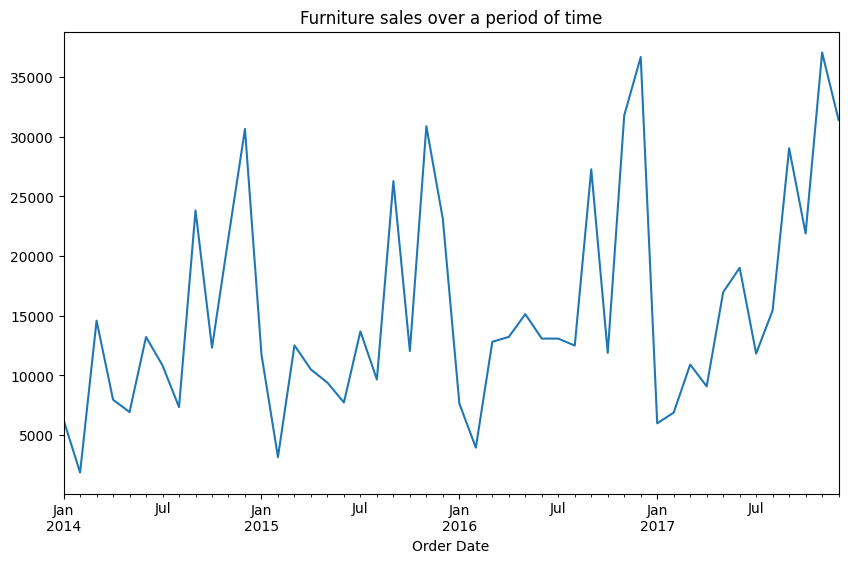

In [48]:
y.plot(figsize=(10,6))
plt.title("Furniture sales over a period of time")
plt.show()

Train- Test Split Manually

In [49]:
#training data
train = y.loc[ : '2016-12-31']
train.tail()

,Sales
Order Date,
2016-08-31,12483.2323
2016-09-30,27262.8809
2016-10-31,11872.5770
2016-11-30,31783.6288
2016-12-31,36678.7150


In [50]:
#validation
test= y.loc['2017-01-31':]
test

,Sales
Order Date,
2017-01-31,5964.0320
2017-02-28,6866.3374
2017-03-31,10893.4448
2017-04-30,9065.9581
2017-05-31,16957.5582
2017-06-30,19008.5867
2017-07-31,11813.0220
2017-08-31,15441.8740
2017-09-30,29028.2060


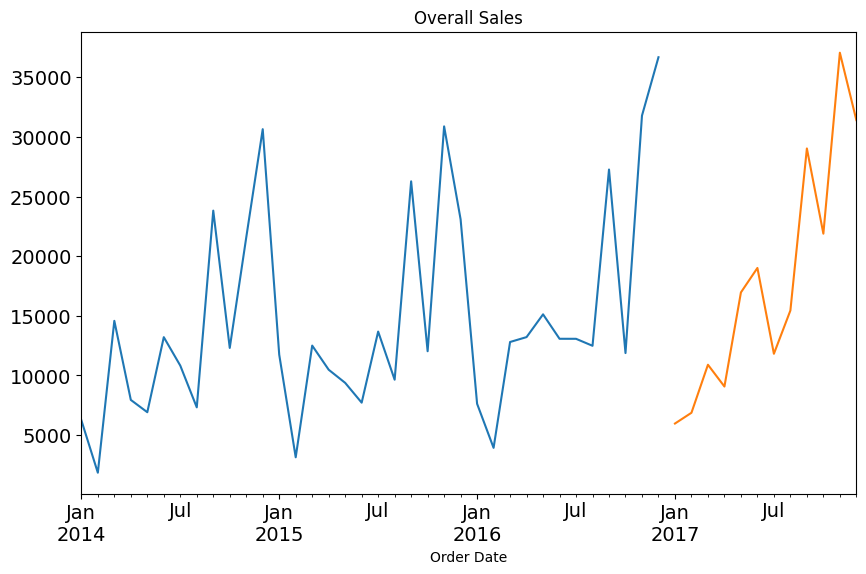

In [51]:
#plotting
train.plot(figsize=(10,6), title = 'Overall Sales' , fontsize=14)
test.plot(figsize=(10,6), title = 'Overall Sales' , fontsize=14)
plt.show()

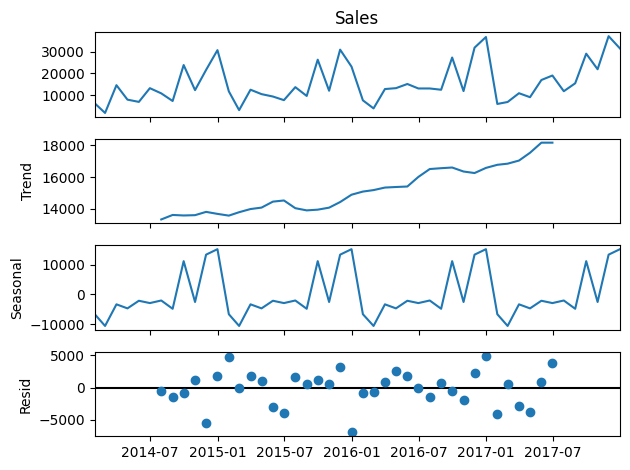

In [52]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y)
decomposition.plot()
plt.show()


/usr/local/lib/python3.12/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


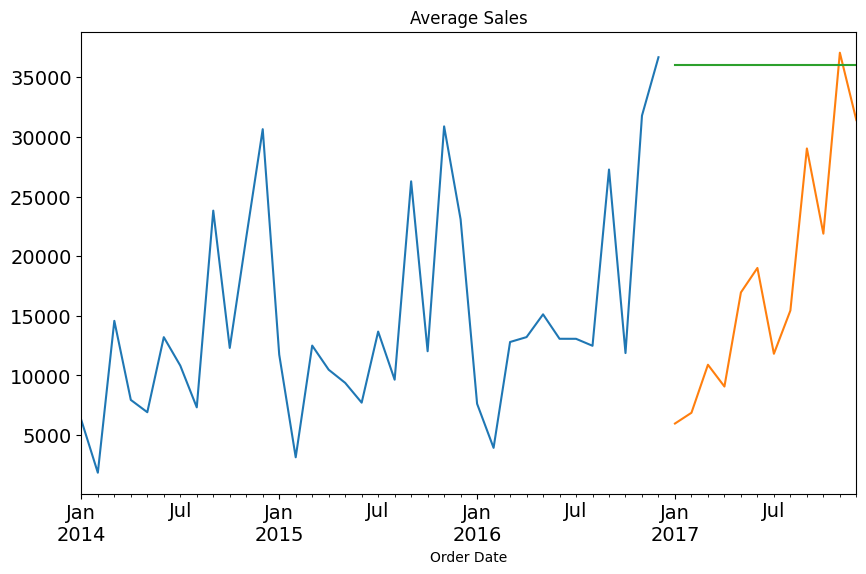

In [57]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are also imp
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.9)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()


In [58]:
fit1.aic

np.float64(663.6362024358069)

Lower the aic better the model

In [59]:
Exp_Smooth.SES

,0
2017-01-31,36004.014241
2017-02-28,36004.014241
2017-03-31,36004.014241
2017-04-30,36004.014241
2017-05-31,36004.014241
2017-06-30,36004.014241
2017-07-31,36004.014241
2017-08-31,36004.014241
2017-09-30,36004.014241
2017-10-31,36004.014241


These can't be used due to trend as well as seasonality

/usr/local/lib/python3.12/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


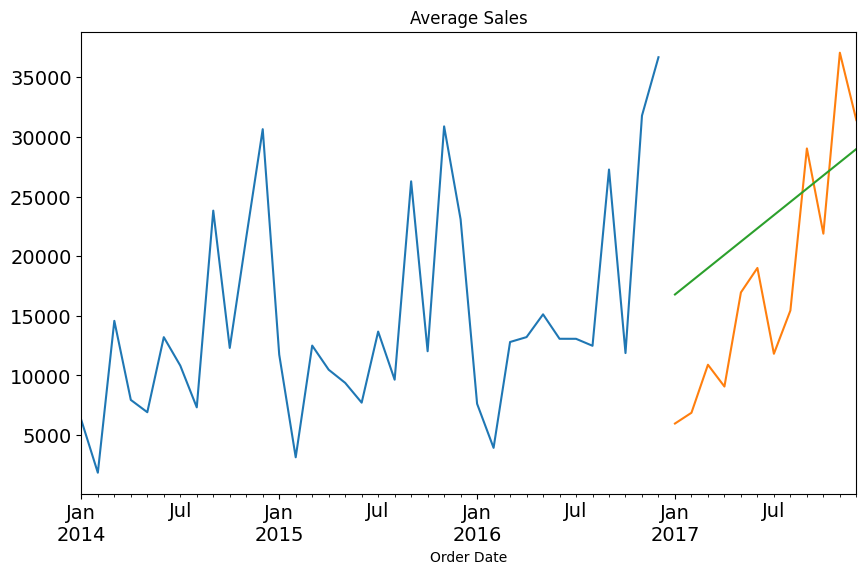

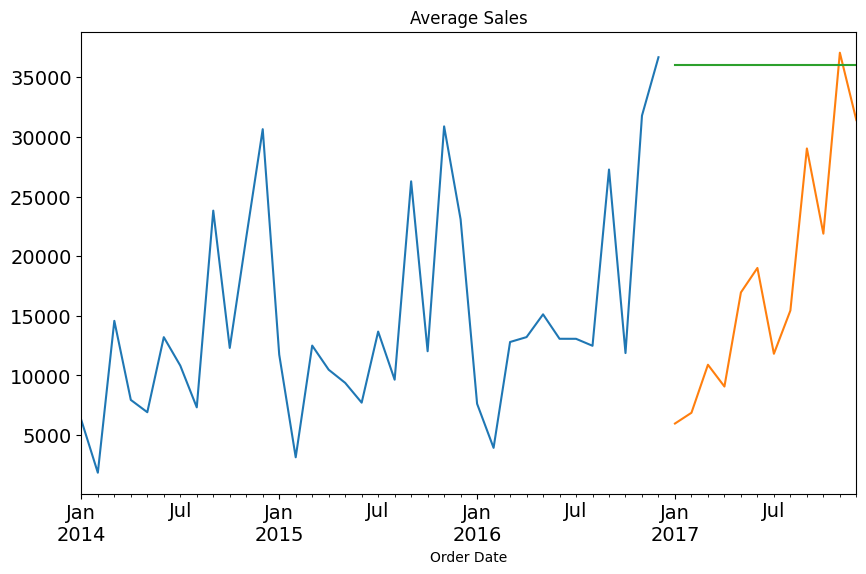

In [60]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
#smoothing slope=beta
fit1 = Holt(train).fit(smoothing_level = 0.1,smoothing_trend = 0.4)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()


In [61]:
fit1.aic

np.float64(694.039127812049)

In [62]:
Holt_df['Holt_linear']

,0
2017-01-31,16784.517387
2017-02-28,17893.627252
2017-03-31,19002.737117
2017-04-30,20111.846981
2017-05-31,21220.956846
2017-06-30,22330.066711
2017-07-31,23439.176575
2017-08-31,24548.286440
2017-09-30,25657.396305
2017-10-31,26766.506169


In [63]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test,Holt_df['Holt_linear'] ))
print(rms)

8160.484738433992


In [66]:
import numpy as np
my_dict={}
for i in np.arange(0.01,1,0.1):
    for j in np.arange(0.01,1,0.1):
        #from statsmodels.tsa.api import Holt
        Holt_df = test.copy()
        #smoothing slope=beta
        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)
        #Holt_df['Holt_linear'] = fit1.forecast(len(test))
        #print(fit1.aic,i,j)
        my_dict[i,j] = fit1.aic

/tmp/ipython-input-2584601592.py:8: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)
/usr/local/lib/python3.12/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/tmp/ipython-input-2584601592.py:8: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)
/usr/local/lib/python3.12/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/tmp/ipython-input-2584601592.py:8: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)
/us

In [65]:
for k in my_dict:
  if my_dict[k]==min(my_dict.values()):
    print(k, ":",my_dict[k])

(np.float64(0.55), np.float64(0.16)) : 666.9320948866841


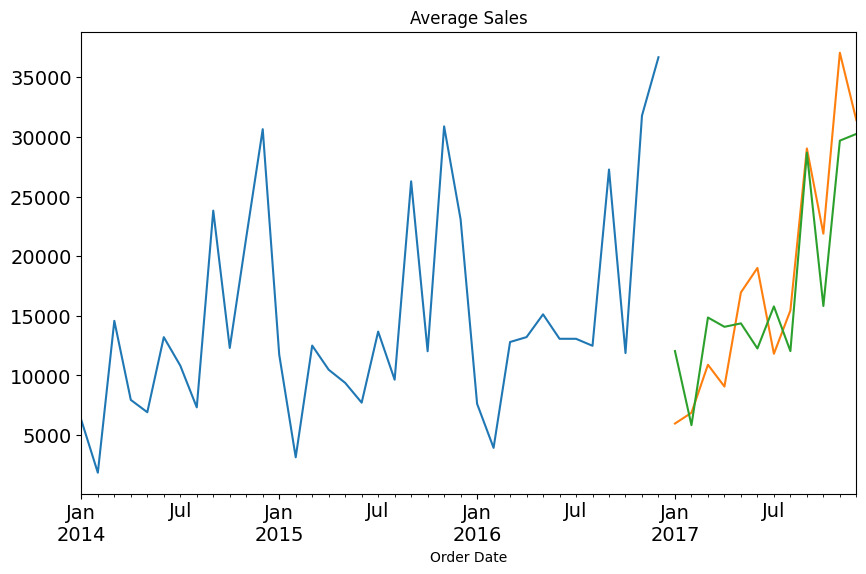

In [67]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(train ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

yellow line - actual data , green - prediction

In [70]:
fit1.aic

np.float64(601.0561276539776)

In [72]:
Holt_Winter_df['Holt_Winter']

,0
2017-01-31,12041.874625
2017-02-28,5825.080387
2017-03-31,14855.287616
2017-04-30,14074.401977
2017-05-31,14362.775946
2017-06-30,12258.599398
2017-07-31,15785.773356
2017-08-31,12034.340592
2017-09-30,28681.814300
2017-10-31,15818.376601


In [71]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test,Holt_Winter_df['Holt_Winter'] ))
print(rms)

4574.407982734602


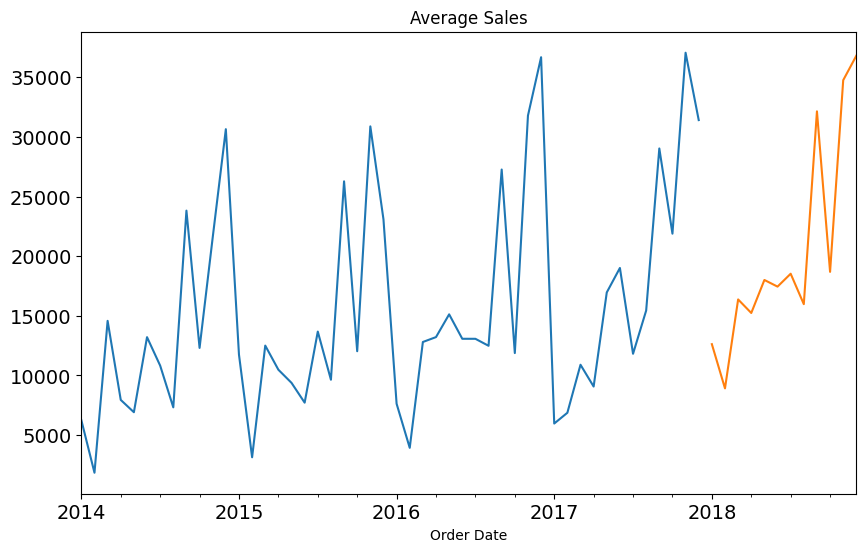

In [73]:
from statsmodels.tsa.api import ExponentialSmoothing

#seasonalperiods=gamma
fit1 = ExponentialSmoothing(y ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
#Y_predictions = fit1.predict(start=pd.to_datetime('2017-01-31'))
Y_predictions = fit1.forecast(steps=12)

y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Y_predictions.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()


In [74]:
Y_predictions

,0
2018-01-31,12620.373332
2018-02-28,8911.553880
2018-03-31,16369.990671
2018-04-30,15233.354183
2018-05-31,18001.357743
2018-06-30,17444.381119
2018-07-31,18525.513694
2018-08-31,15973.484123
2018-09-30,32141.660110
2018-10-31,18681.996906


In [75]:
Y_predictions.to_excel("TimeSeriesOutput.xlsx", header=["Sales"], index= True)